In [3]:
import pandas as pd
from ultralytics import YOLO
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


Prueba con datos de test YOLOV8

In [5]:
# Configuración
#modelo_path = "C:\\Users\\dalil\\Desktop\\Tesis_2025\\TFG---Clasificacion-de-trajes\\YOLOV8\\runs\\classify\\train\\weights\\best.pt"
modelo_path = "C:\\Users\\dalil\\Desktop\\Tesis_2025\\TFG---Clasificacion-de-trajes\\YOLOV8\\modelo8\\train\\weights\\best.pt"
csv_path = "dataset_labels.csv"
output_csv = "C:\\Users\\dalil\\Desktop\\Tesis_2025\\TFG---Clasificacion-de-trajes\\pruebas\\predicciones\\predicciones_octavo_modelo.csv" 

# Cargar el modelo YOLO
model = YOLO(modelo_path)

# Cargar dataset CSV
df = pd.read_csv(csv_path, header=None, names=["link_imagen", "categoria", "split"])

# Filtrar solo las imágenes de prueba
df_test = df[df["split"] == "test"]

# Realizar predicciones
predicciones = []
for img_path in df_test["link_imagen"]:
    if not os.path.exists(img_path):
        print(f"Archivo no encontrado: {img_path}")
    else:
        resultados = model(img_path)  # Inferencia con YOLO
        prediccion = resultados[0].names[int(resultados[0].probs.top1)]  # Obtener la clase más probable
        predicciones.append(prediccion)

# Agregar la columna de predicción al DataFrame
df_test["prediccion"] = predicciones

# Guardar nuevo CSV con predicciones
df_test.to_csv(output_csv, index=False)

print(f"Predicciones guardadas en {output_csv}")




image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\test\fantasia\IMG0574_FAN_FE.png: 256x256 inspiracion 0.90, fantasia 0.10, popular 0.00, tradicional 0.00, 163.1ms
Speed: 7.3ms preprocess, 163.1ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\test\fantasia\IMG0588_FAN_FE.png: 256x256 fantasia 1.00, popular 0.00, inspiracion 0.00, tradicional 0.00, 62.6ms
Speed: 4.0ms preprocess, 62.6ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\test\fantasia\IMG0599_FAN_FE.png: 256x256 fantasia 1.00, popular 0.00, inspiracion 0.00, tradicional 0.00, 76.3ms
Speed: 3.7ms preprocess, 76.3ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 C:\Users\dalil\Desktop\Tesis_2025\Tutorial_yolo_\Tutorial_yolo\dataset\test\fantasia\IMG0601_FAN_FE.png: 256

C:\Users\dalil\AppData\Local\Temp\ipykernel_20288\2094677828.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["prediccion"] = predicciones


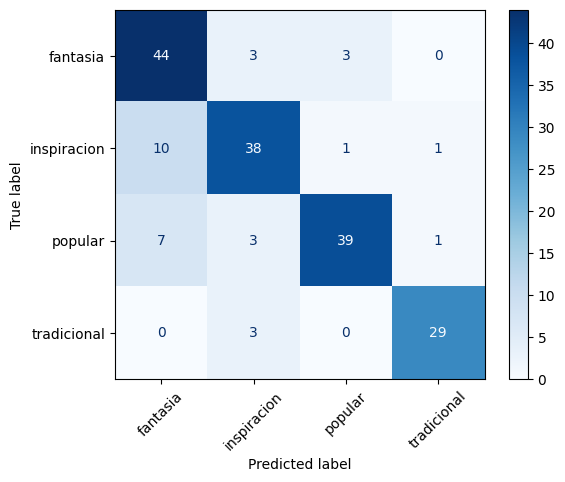

              precision    recall  f1-score     support
fantasia       0.721311  0.880000  0.792793   50.000000
inspiracion    0.808511  0.760000  0.783505   50.000000
popular        0.906977  0.780000  0.838710   50.000000
tradicional    0.935484  0.906250  0.920635   32.000000
accuracy       0.824176  0.824176  0.824176    0.824176
macro avg      0.843071  0.831562  0.833911  182.000000
weighted avg   0.833931  0.824176  0.825334  182.000000


In [6]:

# Cargar el CSV con las predicciones
ruta_csv = output_csv
df = pd.read_csv(ruta_csv)

# Extraer etiquetas reales y predichas
y_true = df["categoria"].tolist()   # Etiquetas reales
y_pred = df["prediccion"].tolist()  # Etiquetas predichas

# Obtener las clases únicas (en caso de que haya errores en el CSV, eliminamos duplicados)
clases = sorted(set(y_true + y_pred))

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=clases)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.show()

# Generar reporte de métricas
reporte = classification_report(y_true, y_pred, labels=clases, output_dict=True)

# Convertir a DataFrame para visualizar mejor
df_reporte = pd.DataFrame(reporte).transpose()

# Mostrar métricas por categoría
print(df_reporte)

# Opcional: Guardar en un archivo CSV
df_reporte.to_csv("reporte_metricas.csv", index=True)



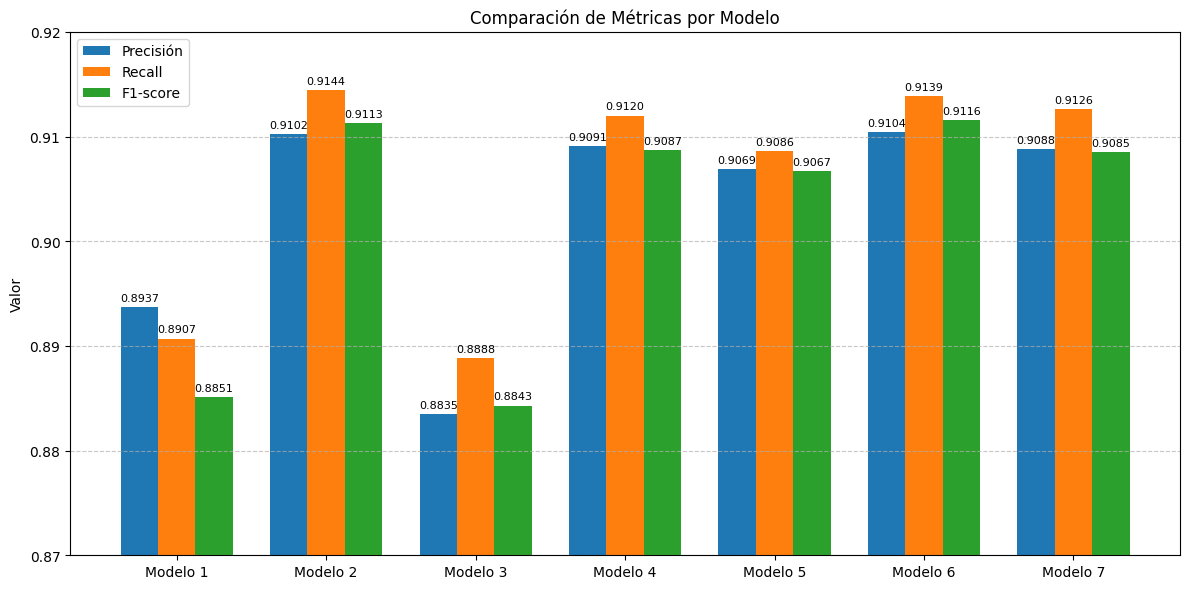

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
modelos = [f'Modelo {i}' for i in range(1, 8)]

# Métricas por modelo
precision = [0.8937, 0.9102, 0.8835, 0.9091, 0.9069, 0.9104, 0.9088]
recall =    [0.8907, 0.9144, 0.8888, 0.9120, 0.9086, 0.9139, 0.9126]
f1_score =  [0.8851, 0.9113, 0.8843, 0.9087, 0.9067, 0.9116, 0.9085]

# Configuración del gráfico
x = np.arange(len(modelos))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, precision, width, label='Precisión')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Añadir etiquetas y títulos
ax.set_ylabel('Valor')
ax.set_title('Comparación de Métricas por Modelo')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.set_ylim(0.87, 0.92)
ax.legend()

# Mostrar valores en cada barra
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


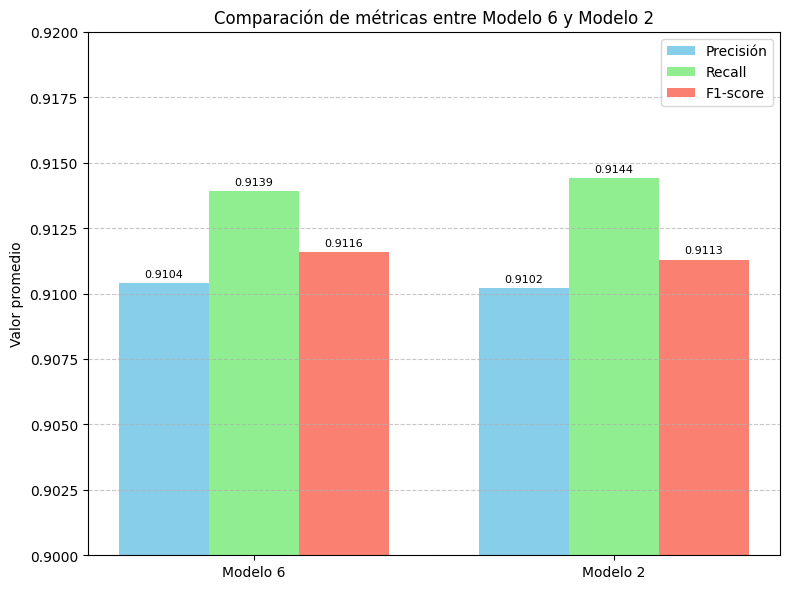

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de los modelos
modelos = ["Modelo 6", "Modelo 2"]
precision = [0.9104, 0.9102]
recall = [0.9139, 0.9144]
f1_score = [0.9116, 0.9113]

# Configuración del gráfico
x = np.arange(len(modelos))  # Posiciones en el eje x
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6))

# Gráficas de las métricas
bars1 = ax.bar(x - width, precision, width, label="Precisión", color='skyblue')
bars2 = ax.bar(x, recall, width, label="Recall", color='lightgreen')
bars3 = ax.bar(x + width, f1_score, width, label="F1-score", color='salmon')

# Añadir etiquetas y títulos
ax.set_ylabel("Valor promedio")
ax.set_title("Comparación de métricas entre Modelo 6 y Modelo 2")
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.set_ylim(0.90, 0.92)
ax.legend()

# Mostrar valores en cada barra
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


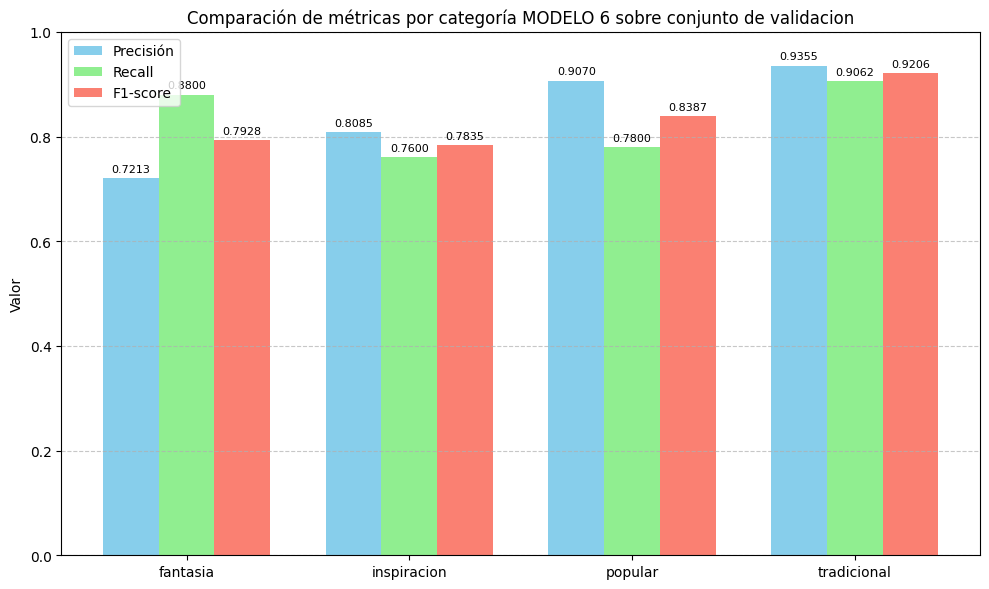

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos por categoría
categorias = ['fantasia', 'inspiracion', 'popular', 'tradicional']
precision = [0.721311, 0.808511, 0.906977, 0.935484]
recall = [0.880000, 0.760000, 0.780000, 0.906250]
f1_score = [0.792793, 0.783505, 0.838710, 0.920635]

# Configuración del gráfico
x = np.arange(len(categorias))  # Posiciones en el eje x
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Gráficas de barras
bars1 = ax.bar(x - width, precision, width, label='Precisión', color='skyblue')
bars2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
bars3 = ax.bar(x + width, f1_score, width, label='F1-score', color='salmon')

# Añadir etiquetas y títulos
ax.set_ylabel("Valor")
ax.set_title("Comparación de métricas por categoría MODELO 6 sobre conjunto de validación")
ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.set_ylim(0.0, 1.0)  # Límites del eje Y
ax.legend()

# Mostrar valores sobre las barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento hacia arriba
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Ajustar diseño y mostrar la cuadrícula
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()